In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("../Kaggle_Housing_Prices/train.csv")
pd.options.display.max_columns=None

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# data.hist(bins=50, figsize=(20,15))
# plt.show()

In [4]:
# data.describe()

In [3]:
clean_df=data.copy()

In [4]:
## drop Id.  DF has index
clean_df.drop("Id", axis=1, inplace=True)
#clean_df.head(2)

In [13]:
clean_df[['MSSubClass', 'SalePrice']].groupby('MSSubClass').median().sort_values(by='SalePrice', ascending=True)

,SalePrice
MSSubClass,
180,88500
30,99900
45,107500
190,128250
50,132000
90,135980
85,140750
40,142500
160,146000


In [15]:
#  MSSubClass could be made linear integers based on median SalePrice in that class.  

SubClassNumber=[]

for each in clean_df["MSSubClass"]:
    if each == 20:
        cat=11
    elif each == 30:
        cat=2
    elif each == 40:
        cat=8
    elif each == 45:
        cat=3
    elif each == 50:
        cat=5
    elif each == 60:
        cat=15
    elif each == 70:
        cat=10
    elif each == 75:
        cat=12
    elif each == 80:
        cat=13
    elif each == 85:
        cat=7
    elif each == 90:
        cat=6
    elif each == 120:
        cat=14
    elif each == 150:
        cat=0
    elif each == 160:
        cat=9
    elif each == 180:
        cat=1
    elif each == 190:
        cat=4
        
    SubClassNumber.append(cat)

clean_df["SubClassInt"]=SubClassNumber
#clean_df.drop("MSSubClass", axis=1, inplace=True)
clean_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,sixty,15
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,twenty,11
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,sixty,15
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,seventy,10
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,sixty,15


In [5]:
##  MSSubClass could be categorical.  

SubClass=[]

for each in clean_df["MSSubClass"]:
    if each == 20:
        cat='twenty'
    elif each == 30:
        cat='thirty'
    elif each == 40:
        cat='forty'
    elif each == 45:
        cat='fortyfive'
    elif each == 50:
        cat='fifty'
    elif each == 60:
        cat='sixty'
    elif each == 70:
        cat='seventy'
    elif each == 75:
        cat='seventyfive'
    elif each == 80:
        cat='eighty'
    elif each == 85:
        cat='eightyfive'
    elif each == 90:
        cat='ninety'
    elif each == 120:
        cat='onetwenty'
    elif each == 150:
        cat='onefifty'
    elif each == 160:
        cat='onesixty'
    elif each == 180:
        cat='oneeighty'
    elif each == 190:
        cat='oneninety'
        
    SubClass.append(cat)

clean_df["SubClass"]=SubClass
#clean_df.drop("MSSubClass", axis=1, inplace=True)
clean_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,sixty
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,twenty
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,sixty
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,seventy
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,sixty


## Fill null values

In [16]:
## Many houses do not have basements.  fill basement NaN's with 'none'
clean_df['BsmtQual'].fillna('none', inplace=True)
clean_df['BsmtCond'].fillna('none', inplace=True)
clean_df['BsmtExposure'].fillna('none', inplace=True)
clean_df['BsmtFinType1'].fillna('none', inplace=True)
clean_df['BsmtFinType2'].fillna('none', inplace=True)
clean_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,sixty,15
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,twenty,11
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,sixty,15
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,seventy,10
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,sixty,15


In [17]:
## fill Alley NaN's with 'none'
clean_df['Alley'].fillna('none', inplace=True)

## fil Lot Frontage with Median
median=clean_df['LotFrontage'].median()
clean_df['LotFrontage'].fillna(median, inplace=True)

In [18]:
## drop 1 row with NaN for Electrical
clean_df.dropna(axis=0, subset=['Electrical'], inplace=True)

In [19]:
## fil fireplaceQual NaN's with 'none'
clean_df['FireplaceQu'].fillna('none', inplace=True)

In [20]:
## take care of garage NaN's

clean_df['GarageType'].fillna('none', inplace=True)
clean_df['GarageYrBlt'].fillna(0, inplace=True)
clean_df['GarageFinish'].fillna('none', inplace=True)
clean_df['GarageQual'].fillna('none', inplace=True)
clean_df['GarageCond'].fillna('none', inplace=True)

In [21]:
# ## Should garage year built be dropped. No garage with year 0 creates extreme scale differences.  Condition
# ## and quality should be more important than year.

# clean_df.drop('GarageYrBlt', axis=1, inplace=True)

In [22]:
## Pool NaN's
clean_df['PoolQC'].fillna('none', inplace=True)
## Fence
clean_df['Fence'].fillna('none', inplace=True)
## MiscFeature
clean_df['MiscFeature'].fillna('none', inplace=True)

In [23]:
# vnr=clean_df.loc[clean_df['MasVnrType'].isnull()]
# vnr

clean_df['MasVnrType'].fillna('none', inplace=True)
clean_df['MasVnrArea'].fillna(0, inplace=True)

In [24]:
### No more NaN's in dataset
clean_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
SaleType         0
SaleCondition    0
SalePrice        0
SubClass         0
SubClassInt      0
Length: 82, dtype: int64

## Quality can be numerical

In [25]:
## Exterior Quality can be numerical
exqual=[]

for each in clean_df['ExterQual']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    exqual.append(q)
    
clean_df['ExtQuality']=exqual
clean_df.drop('ExterQual', axis=1, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,181500,twenty,11,3


In [26]:
## Exterior condition can be numerical
excond=[]

for each in clean_df['ExterCond']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    excond.append(q)
    
clean_df['ExtCondition']=excond
clean_df.drop('ExterCond', axis=1, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4,3
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,181500,twenty,11,3,3


In [27]:
## Basement Quality can be numerical
bqual=[]

for each in clean_df['BsmtQual']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    bqual.append(q)
    


In [28]:
clean_df['BsmtQuality']=bqual
## save column for now. see if correlation is better with numeric or binary
#clean_df.head(2)

In [29]:
## basement condition can be numerical

bcond=[]

for each in clean_df['BsmtCond']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    bcond.append(q)

clean_df["BasementCond"]=bcond

In [30]:
## HeatingQC can be numerical
hq=[]

for each in clean_df['HeatingQC']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    hq.append(q)

clean_df['HeatQuality']=hq

## leave string version in dataframe.  will check correlations later and remove low values
##clean_df.drop('HeatingQC', axis=1, inplace=True)

In [31]:
## Central Air
ac=[]

for each in clean_df['CentralAir']:
    if each == 'N':
        v=0
    elif each == 'Y':
        v=1
    ac.append(v)
    
clean_df['CentralAC']=ac
clean_df.drop('CentralAir', axis=1, inplace=True)

In [32]:
## Kitchen Quaity
kq=[]

for each in clean_df['KitchenQual']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    kq.append(q)
    
clean_df['KitchQuality']=kq
##clean_df.drop('KitchenQual', axis=1, inplace=True)

In [33]:
## Functional
fnc=[]

for each in clean_df['Functional']:
    if each=='Typ':
        q=8
    elif each =='Min1':
        q=7
    elif each =='Min2':
        q=6
    elif each =='Mod':
        q=5
    elif each =='Maj1':
        q=4
    elif each =='Maj2':
        q=3
    elif each == 'Sev':
        q=2
    elif each == 'Sal':
        q=1
    fnc.append(q)
    
clean_df['Functionality']=fnc
##clean_df.drop('Functional', axis=1, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4,3,4,3,5,1,4,8
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,181500,twenty,11,3,3,4,3,5,1,3,8


In [34]:
## Fireplace Quality
fpq=[]

for each in clean_df['FireplaceQu']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    fpq.append(q)
    
clean_df['FireplaceQuality']=fpq
##clean_df.drop('FireplaceQu', axis=1, inplace=True)

In [35]:
## Garage Quality

gq=[]

for each in clean_df['GarageQual']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    gq.append(q)
    
clean_df['GarageQuality']=gq

In [36]:
gc=[]

for each in clean_df['GarageCond']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    gc.append(q)
    
clean_df['GarageCondition']=gc

In [37]:
### Add a column using Median Neighborhood value

medsaledf=data.groupby('Neighborhood').median()
medsaledf['SalePrice'].sort_values()

Neighborhood
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
Name: SalePrice, dtype: float64

In [38]:
meds=[]

for each in clean_df['Neighborhood']:
    if each == 'MeadowV':
        m=88000
    elif each == 'IDOTRR':
        m=103000
    elif each == 'BrDale':
        m=106000
    elif each == 'OldTown':
        m=119000
    elif each == 'Edwards':
        m=121750
    elif each == 'BrkSide':
        m=124300
    elif each == 'Sawyer':
        m=135000
    elif each == 'Blueste':
        m=137500
    elif each == 'SWISU':
        m=139500
    elif each == 'NAmes':
        m=140000
    elif each == 'NPkVill':
        m=146000
    elif each == 'Mitchel':
        m=153500
    elif each == 'SawyerW':
        m=179900
    elif each == 'Gilbert':
        m=181000
    elif each == 'NWAmes':
        m=182900
    elif each == 'Blmngtn':
        m=191000
    elif each == 'CollgCr':
        m=197200
    elif each == 'ClearCr':
        m=200250
    elif each == 'Crawfor':
        m=200624
    elif each == 'Veenker':
        m=218000
    elif each == 'Somerst':
        m=225500
    elif each == 'Timber':
        m=228475
    elif each == 'StoneBr':
        m=278000
    elif each == 'NoRidge':
        m=301500
    elif each == 'NridgHt':
        m=315000
        
    meds.append(m)
    
clean_df['NeighborhoodMedValue']=meds
clean_df.drop('Neighborhood', axis=1, inplace=True)

In [ ]:
# ## Add a column total rooms per total square feet

# clean_df['RmsPerSF']=(clean_df['TotRmsAbvGrd']/(clean_df['1stFlrSF']+clean_df['2ndFlrSF']))

# corrDF=O2_df[['TotRmsAbvGrd', 'RmsPerSF', 'SalePrice']]
# corrDF.corr()

In [ ]:
# ### No better than TotRmsAbvGrd
# clean_df.drop('RmsPerSF', axis=1, inplace=True)

In [47]:
## Add a column using Zoning median Price

zmed=[]

for each in clean_df['MSZoning']:
    if each == 'C(all)':
        z=74700
    elif each == 'RM':
        z=120500
    elif each == 'RH':
        z=136500
    elif each == 'RL':
        z=174000
    elif each == 'FV':
        z=205950
    zmed.append(z)
    
clean_df['ZoningMedian']=zmed

In [48]:
clean_df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4,3,4,3,5,1,4,8,0,3,3,197200,174000


In [98]:
#clean_df[['LandContour', 'SalePrice']].groupby('LandContour').mean().sort_values(by='SalePrice', ascending=True)
clean_df['BldgType'].value_counts()
clean_df.loc[clean_df['TotalBsmtSF']>2500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian
332,20,RL,85.0,10655,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,PConc,Gd,TA,No,GLQ,1124,none,479,1603,3206,GasA,Ex,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,none,none,none,0,10,2009,WD,Normal,284000,twenty,11,4,3,4,3,5,1,4,8,4,3,3,315000,174000
440,20,RL,105.0,15431,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,none,none,none,0,4,2009,WD,Normal,555000,twenty,11,5,3,5,3,5,1,5,8,4,3,3,315000,174000
496,20,RL,69.0,12692,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,PConc,Gd,TA,No,GLQ,1231,Unf,0,1969,3200,GasA,Ex,SBrkr,3228,0,0,3228,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992.0,RFn,2,546,TA,TA,Y,264,75,291,0,0,0,none,none,none,0,5,2007,WD,Normal,430000,twenty,11,4,3,4,3,5,1,4,8,4,3,3,301500,174000
523,60,RL,130.0,40094,Pave,none,IR1,Bnk,AllPub,Inside,Gtl,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,none,none,none,0,10,2007,New,Partial,184750,sixty,15,5,3,5,3,5,1,5,8,4,3,3,121750,174000
1044,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,1Fam,1Story,8,5,1981,1981,Hip,WdShngl,BrkFace,BrkFace,None,0.0,PConc,Gd,TA,No,ALQ,1104,Unf,0,1420,2524,GasA,TA,SBrkr,2524,0,0,2524,1,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1981.0,Fin,2,542,TA,TA,Y,474,120,0,0,0,0,none,MnPrv,none,0,7,2009,WD,Normal,278000,twenty,11,4,3,4,3,3,1,4,8,4,3,3,182900,174000
1298,60,RL,313.0,63887,Pave,none,IR3,Bnk,AllPub,Corner,Gtl,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,none,none,0,1,2008,New,Partial,160000,sixty,15,5,3,5,3,5,1,5,8,4,3,3,121750,174000
1373,20,RL,69.0,11400,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,10,5,2001,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,705.0,PConc,Ex,TA,Gd,GLQ,1282,Unf,0,1351,2633,GasA,Ex,SBrkr,2633,0,0,2633,1,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2001.0,RFn,3,804,TA,TA,Y,314,140,0,0,0,0,none,none,none,0,3,2007,WD,Normal,466500,twenty,11,5,3,5,3,5,1,5,8,4,3,3,301500,174000


## Find Outliers

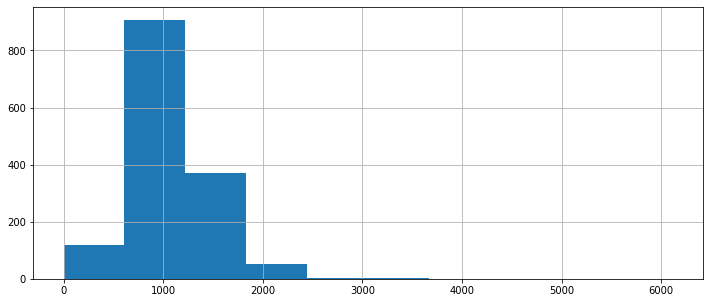

In [97]:
clean_df['TotalBsmtSF'].hist(figsize=(12,5))

In [87]:
newdf=clean_df.copy()

In [88]:
newdf=newdf.loc[newdf['SalePrice']<470000]

In [94]:
# newdf.drop([523, 1298], inplace=True)
# newdf.drop('Street', axis=1, inplace=True)
#newdf.drop('BsmtFinSF2', axis=1, inplace=True)     ##very skewed distribution

In [90]:
## LotArea 

temp=newdf.loc[newdf['LotArea']>75000]
temp[['LotArea', 'SalePrice']]
249,313,335,706

median=newdf.loc[newdf['LotArea']<75000, 'LotArea'].median()
newdf.loc[newdf['LotArea']>75000, 'LotArea']=np.nan
newdf.fillna(median, inplace=True)

newdf.loc[[249]]


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian
249,50,RL,69.0,9410.5,none,IR2,Low,AllPub,CulDSac,Sev,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,none,none,Shed,500,6,2007,WD,Normal,277000,fifty,5,4,3,4,3,4,1,4,8,3,3,3,200250,174000


In [91]:
## MasVnrArea  set max to 800

temp=newdf.loc[newdf['MasVnrArea']>800]
temp[['MasVnrArea', 'SalePrice']]

#median=newdf.loc[newdf['MasVnrArea']<800, 'MasVnrArea'].median()
newdf.loc[newdf['MasVnrArea']>800, 'MasVnrArea']=np.nan
newdf.fillna(800, inplace=True)

newdf.loc[[115]]


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian
115,160,FV,34.0,3230.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,TwnhsE,2Story,6,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,BrkFace,800.0,PConc,Gd,TA,No,GLQ,419,Unf,0,310,729,GasA,Gd,SBrkr,729,729,0,1458,0,0,2,1,2,1,TA,5,Typ,1,Fa,Detchd,1999.0,Unf,2,440,TA,TA,Y,0,32,0,0,0,0,none,none,none,0,6,2007,WD,Normal,176000,onesixty,9,3,3,4,3,4,1,3,8,2,3,3,225500,205950


## OneHotEncode

In [48]:
## Turn string categories into binary

clean_binary=pd.get_dummies(clean_df)
clean_binary.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_none,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_none,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFea

In [35]:
clean_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 294 entries, MSSubClass to SubClass_twenty
dtypes: float64(2), int64(46), uint8(246)
memory usage: 909.0 KB


## Create Train, Validation, and Test sets

In [49]:
## Split data into train and test sets

from sklearn.model_selection import train_test_split

In [50]:
from sklearn.metrics import mean_squared_error

###  MinMax Scaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

MMscaler=MinMaxScaler()

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest_model=RandomForestRegressor()

In [53]:
from sklearn.preprocessing import StandardScaler

####  Linear MSE   63,789
#### Scaled Linear MSE    5e16
#### Tree MSE    60,072
#### Scaled Tree MSE   51,987
#### Forest MSE 39, 613
#### MINMAX Scaled Forest MSE  38,774
#### Standard Scaler Forest MSE  38,743

### Check correlations and drop columns with low R2 value

In [55]:
## Look at some Correlations
corr_matrix=clean_binary.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
OverallQual             0.791069
NeighborhoodMedValue    0.733867
GrLivArea               0.708618
ExtQuality              0.682677
                          ...   
MasVnrType_None        -0.374464
GarageFinish_Unf       -0.410809
BsmtQual_TA            -0.452626
FireplaceQu_none       -0.471971
KitchenQual_TA         -0.519600
Name: SalePrice, Length: 295, dtype: float64

In [56]:
## Turn into a DataFrame

corr_list=corr_matrix['SalePrice'].sort_values(ascending=False)
corr_df=pd.DataFrame(corr_list)
corr_df.reset_index().head()

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.791069
2,NeighborhoodMedValue,0.733867
3,GrLivArea,0.708618
4,ExtQuality,0.682677


## Play with dropped columns starting here

In [65]:
## Turn into a list to loop through
drop_list=corr_df.loc[(corr_df['SalePrice']<0.11) & (corr_df['SalePrice']> -0.11)]
        
drop_list.reset_index(inplace=True)
drop_list['index']

cols=drop_list['index'].tolist()
cols[:5]

simple_df=clean_binary.copy()

for each in cols:
    simple_df.drop(each, axis=1, inplace=True)

In [55]:
## try dropping columns with < .1 R2value

# simple_df=clean_binary.copy()

# for each in cols:
#     simple_df.drop(each, axis=1, inplace=True)

In [66]:
clean_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 295 entries, MSSubClass to SubClass_twenty
dtypes: float64(3), int64(46), uint8(246)
memory usage: 920.4 KB


In [67]:
## Compare number of columns vs original

simple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 133 entries, LotFrontage to SubClass_thirty
dtypes: float64(3), int64(34), uint8(96)
memory usage: 569.9 KB


## Look for Outliers

In [75]:
## Look at square footage by Neighborhood

avgftdf=data.groupby('Neighborhood').median()
avgftdf['GrLivArea'].sort_values()

Neighborhood
MeadowV    1092.0
Sawyer     1106.0
IDOTRR     1128.0
BrDale     1155.0
NAmes      1200.0
Edwards    1200.0
Mitchel    1204.0
BrkSide    1210.5
NPkVill    1322.0
OldTown    1374.0
Blueste    1392.5
Veenker    1437.0
CollgCr    1500.0
Blmngtn    1500.0
Somerst    1564.5
Gilbert    1593.0
SawyerW    1603.0
NWAmes     1664.0
Timber     1689.5
SWISU      1691.0
Crawfor    1717.0
ClearCr    1738.0
StoneBr    1742.0
NridgHt    1850.0
NoRidge    2418.0
Name: GrLivArea, dtype: float64

In [79]:
outlier_df=outlier_df.loc[(outlier_df['SalePrice']<470000) | (outlier_df['GrLivArea']< 3500)]

In [197]:
outlier_df.head(2)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,ExtQuality,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,MSZoning_C (all),MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_none,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_HLS,LotConfig_CulDSac,Condition1_Feedr,Condition1_Norm,BldgType_1Fam,BldgType_Duplex,HouseStyle_1.5Fin,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_WdShngl,Exterior1st_CemntBd,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Fa,BsmtCond_none,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Rec,BsmtFinType1_none,BsmtFinType2_Unf,BsmtFinType2_none,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_none,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_TA,GarageCond_none,PavedDrive_N,PavedDrive_Y,PoolQC_Ex,Fence_MnPrv,Fence_none,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SubClass_fifty,SubClass_ninety,SubClass_onesixty,SubClass_sixty,SubClass_thirty
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,208500,4,4,3,5,1,4,0,3,3,197200,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,181500,3,4,3,5,1,3,3,3,3,218000,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0


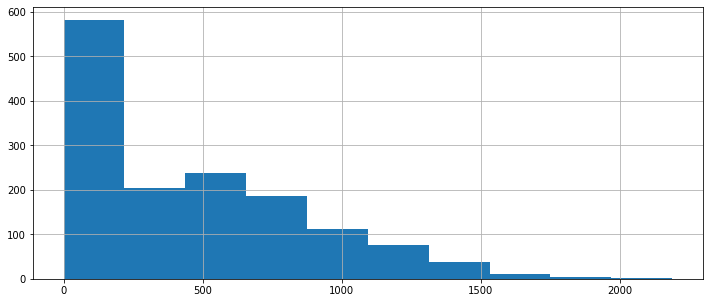

In [222]:
outlier_df['BsmtFinSF1'].hist(figsize=(12,5))

## Continue dropping outliers in Oulier_df2

In [221]:
## MasVnrArea

temp=outlier_df.loc[outlier_df['MasVnrArea']>800]
temp[['MasVnrArea', 'SalePrice']]

# outlier_df2=outlier_df.copy()
# median=outlier_df.loc[outlier_df['LotArea']<75000, 'LotArea'].median()
# outlier_df2.loc[outlier_df2['LotArea']>75000, 'LotArea']=np.nan
# outlier_df2.fillna(median, inplace=True)

# outlier_df2.loc[[249]]


,MasVnrArea,SalePrice
58,1031.0,438780
70,1115.0,244000
115,1129.0,176000
224,922.0,386250
297,1600.0,239000
349,870.0,437154
517,921.0,265000
755,894.0,172500
798,860.0,485000
808,1047.0,159950


In [81]:
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Columns: 133 entries, LotFrontage to SubClass_thirty
dtypes: float64(3), int64(34), uint8(96)
memory usage: 567.6 KB


In [82]:
simple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 133 entries, LotFrontage to SubClass_thirty
dtypes: float64(3), int64(34), uint8(96)
memory usage: 569.9 KB


In [84]:
## Scale outlier_df data
from sklearn.preprocessing import StandardScaler

XO= outlier_df.drop('SalePrice', axis=1)
yO= outlier_df['SalePrice']

stdscaler=StandardScaler()
XO_stdScaled=stdscaler.fit_transform(XO)

XO_Train, XO_Test, yO_Train, yO_Test=train_test_split(XO_stdScaled, yO, train_size=.75, random_state=42)
XO_train, XO_val, yO_train, yO_val=train_test_split(XO_Train, yO_Train, train_size=0.85, random_state=42)

In [85]:
forest_model.fit(XO_train, yO_train)
forest_model.score(XO_train, yO_train)

0.9839371604707744

In [86]:
forest_model.score(XO_val, yO_val)

0.8860142044260603

In [87]:
O_forest_predictions=forest_model.predict(XO_val)

O_forest_mse= mean_squared_error(yO_val, O_forest_predictions)
O_forest_rmse=np.sqrt(O_forest_mse)
O_forest_rmse

21944.14746409158

In [88]:
## Look at some Correlations
corr_matrix2=outlier_df.corr()
corr_matrix2['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
OverallQual             0.799860
NeighborhoodMedValue    0.748647
GrLivArea               0.713028
ExtQuality              0.699893
                          ...   
MasVnrType_None        -0.391495
GarageFinish_Unf       -0.425262
BsmtQual_TA            -0.468543
FireplaceQu_none       -0.482725
KitchenQual_TA         -0.532148
Name: SalePrice, Length: 133, dtype: float64

In [89]:
## Turn into a DataFrame

corr_list2=corr_matrix2['SalePrice'].sort_values(ascending=False)
corr_df2=pd.DataFrame(corr_list2)
corr_df2.reset_index().head()

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.799860
2,NeighborhoodMedValue,0.748647
3,GrLivArea,0.713028
4,ExtQuality,0.699893


## Play with R2 here

In [157]:
## Turn into a list to loop through
drop_list2=corr_df2.loc[(corr_df2['SalePrice']<0.22) & (corr_df2['SalePrice']> -0.22)]
        
drop_list2.reset_index(inplace=True)
drop_list2['index']

cols2=drop_list2['index'].tolist()
cols2[:5]

## try dropping columns with < .05 R2value

O2_df=outlier_df.copy()

for each in cols2:
    O2_df.drop(each, axis=1, inplace=True)
    
O2_df.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,ExtQuality,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,MSZoning_RL,MSZoning_RM,LotShape_Reg,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,HeatingQC_Ex,HeatingQC_TA,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Ex,FireplaceQu_Gd,FireplaceQu_none,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_none,GarageFinish_Fin,GarageFinish_Unf,GarageFinish_none,GarageQual_TA,GarageQual_none,GarageCond_TA,GarageCond_none,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Partial,SubClass_sixty,SubClass_thirty
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,69.520303,10423.251893,6.083964,1971.199587,1984.790778,100.788025,436.938747,566.761184,1050.473503,1156.673778,341.520991,1503.673778,0.423950,1.560220,0.379904,6.499656,0.608396,1868.107364,1.762560,471.133517,93.710255,46.085341,179650.857536,3.391604,3.483827,2.934618,4.141776,0.934618,3.505850,1.818995,2.807983,2.807983,174395.801101,0.788025,0.149346,0.635926,0.302822,0.783207,0.194081,0.353751,0.346180,0.592567,0.086717,0.436339,0.441156,0.079835,0.424639,0.445974,0.089470,0.655196,0.284240,0.505850,0.294563,0.913971,0.065382,0.401927,0.505850,0.015829,0.260151,0.474191,0.596008,0.059188,0.265657,0.055747,0.238128,0.415692,0.055747,0.898142,0.055747,0.907777,0.055747,0.061941,0.917412,0.082588,0.868548,0.084652,0.202340,0.047488
std,20.879568,9843.053145,1.363070,30.140947,20.662052,173.956881,429.671136,442.400281,411.561016,368.992054,429.108905,491.101286,0.517495,0.546704,0.502263,1.604326,0.639698,454.697618,0.745548,211.793291,125.100932,65.162783,75485.090383,0.570255,0.873890,0.553469,0.960226,0.247284,0.659326,1.810095,0.722249,0.721295,55665.908330,0.408848,0.356552,0.481335,0.459637,0.412202,0.395628,0.478298,0.475915,0.491526,0.281517,0.496101,0.496696,0.271131,0.494458,0.497244,0.285519,0.475468,0.451207,0.500138,0.456003,0.280503,0.247284,0.490456,0.500138,0.124858,0.438868,0.499505,0.490865,0.236057,0.441835,0.229511,0.426085,0.493011,0.229511,0.302566,0.229511,0.289440,0.229511,0.241131,0.275353,0.275353,0.338011,0.278460,0.401883,0.212753
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,88000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [104]:
corrDF=O2_df[['TotRmsAbvGrd', 'SalePrice']]
corrDF.corr()

,TotRmsAbvGrd,SalePrice
TotRmsAbvGrd,1.000000,0.531723
SalePrice,0.531723,1.000000


## Drop columns here

In [140]:
## O2_df.drop(['1stFlrSF', 'BsmtFinSF1'], axis=1, inplace=True)
##  2ndFlrSF    GarageCondition

## Scale here

In [158]:
XO2= O2_df.drop('SalePrice', axis=1)
yO2= O2_df['SalePrice']

XO2_stdScaled=stdscaler.fit_transform(XO2)

XO2_Train, XO2_Test, yO2_Train, yO2_Test=train_test_split(XO2_stdScaled, yO2, train_size=.75, random_state=42)
XO2_train, XO2_val, yO2_train, yO2_val=train_test_split(XO2_Train, yO2_Train, train_size=0.85, random_state=42)

## Score here

In [159]:
forest_model2=RandomForestRegressor()

forest_model2.fit(XO2_train, yO2_train)
forest_model2.score(XO2_train, yO2_train)

0.9831842947402804

In [160]:
forest_model2.score(XO2_val, yO2_val)

0.8894934392820072

In [161]:
O2_forest_predictions=forest_model2.predict(XO2_val)

O2_forest_mse= mean_squared_error(yO2_val, O2_forest_predictions)
O2_forest_rmse=np.sqrt(O2_forest_mse)
O2_forest_rmse

21606.647015180446

## Cross Validate

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
scores=cross_val_score(forest_model2, XO2_train, yO2_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-scores)
forest_rmse_scores.mean()

26500.734196960268

## Grid Search Parameters

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [193]:
forest_model3=RandomForestRegressor()

param_grid= [
        {'bootstrap': [False], 'n_estimators': [200, 300, 400, 800], 'max_features': ['sqrt'], 'max_depth': [50, 70, 150]},
]

grid_search=GridSearchCV(forest_model3, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(XO2_train, yO2_train)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [ ]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

In [194]:
forest_model3.fit(XO2_train, yO2_train)
forest_model3.score(XO2_train, yO2_train)

0.9829470605549637

In [195]:
forest_model3.score(XO2_val, yO2_val)

0.8863015140394451

In [196]:
f3_predictions=forest_model3.predict(XO2_val)

f3_mse= mean_squared_error(yO2_val, f3_predictions)
f3_rmse=np.sqrt(f3_mse)
f3_rmse

21916.47409297887

## RandomizedSearchCV

In [172]:
rf=RandomForestRegressor()

grid= {
    'n_estimators': [85, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 25, 50, 100],
    'bootstrap': [True, False]
}

rf_random=RandomizedSearchCV(rf, grid, n_iter=64, cv=5, random_state=42)

rf_random.fit(XO2_train, yO2_train)

C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 48 is smaller than n_iter=64. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [173]:
rf_random.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': False}

In [174]:
rf_random.score(XO2_train, yO2_train)

0.9999999847460089

In [175]:
rf_random.score(XO2_val, yO2_val)

0.8916486284447851

In [176]:
rf_predictions=rf_random.predict(XO2_val)

rf_mse= mean_squared_error(yO2_val, rf_predictions)
rf_rmse=np.sqrt(rf_mse)
rf_rmse

21394.914351570606

### More Cross Validation

In [171]:
rfscores=cross_val_score(rf_random, XO2_train, yO2_train, scoring="neg_mean_squared_error", cv=5)
rf_random_rmse_scores=np.sqrt(-rfscores)
rf_random_rmse_scores.mean()